# Table of Contents
## 1. Importing Libraries & Data
## 2. Cleaning Data
## 3. Regression Analysis
## 4. Exporting Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 1. Importing Libraries & Data

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Creating path

path = r'/Users/mattwawner/Documents/Achievement 6'

In [4]:
# Importing data

df = pd.read_pickle(os.path.join(path, '2Clean_Boat_Data.pkl'))

# 2. Cleaning Data

In [5]:
df.columns

Index(['Boat Type', 'Manufacturer', 'Year Built', 'Length', 'Width',
       'Material', 'Views last week', 'Euro Price', 'Country', 'Region',
       'City', 'Fuel Type', 'New/Used', 'Age Range', 'Length Range',
       'View Group'],
      dtype='object')

In [6]:
df.head()

,Boat Type,Manufacturer,Year Built,Length,Width,Material,Views last week,Euro Price,Country,Region,City,Fuel Type,New/Used,Age Range,Length Range,View Group
0,Motor Yacht,Rigiflex power boats,2017,4.00,1.90,nan,226,3370.37,Switzerland,Lake Geneva,VÃ©senaz,None,new boat from stock,After 2010,Under 8m long,200-400
1,Center console boat,Terhi power boats,2020,4.00,1.50,Thermoplastic,75,3490.00,Germany,BÃ¶nningstedt,None,None,new boat from stock,After 2010,Under 8m long,Under 200 views
3,Sport Boat,Pioner power boats,2020,3.00,1.00,nan,64,3367.00,Denmark,Svendborg,None,None,new boat from stock,After 2010,Under 8m long,Under 200 views
4,Fishing Boat,Linder power boats,2019,3.55,1.46,Aluminium,58,3399.00,Germany,Bayern,MÃ¼nchen,None,new boat from stock,After 2010,Under 8m long,Under 200 views
6,Catamaran,nan,1999,6.20,2.38,Aluminium,474,3636.00,Switzerland,Neuenburgersee,Yvonand,Unleaded,Used boat,Before 2000,Under 8m long,Over 400 views


In [7]:
df.shape

(9337, 16)

In [8]:
# Checking for missing values

df.isnull().sum()

Boat Type             0
Manufacturer          0
Year Built            0
Length                0
Width                 0
Material              0
Views last week       0
Euro Price            0
Country               0
Region              888
City               6353
Fuel Type          2131
New/Used              0
Age Range             0
Length Range          0
View Group            0
dtype: int64

### Since the missing values are categorical variables, I did not replace them for this analysis

In [9]:
# Checking for duplicates

dups=df.duplicated()

In [10]:
dups.shape

(9337,)

### No duplicate values were found

/Users/mattwawner/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year Built', ylabel='Density'>

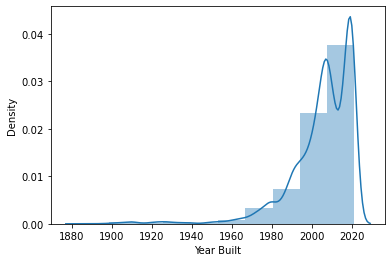

In [11]:
# Checking for extreme values

sns.distplot(df['Year Built'], bins=10) 

In [12]:
df['Year Built'].min()

1885

/Users/mattwawner/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length', ylabel='Density'>

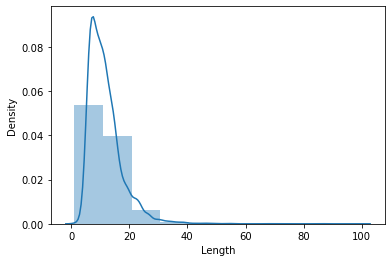

In [13]:
sns.distplot(df['Length'], bins=10) 

/Users/mattwawner/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Width', ylabel='Density'>

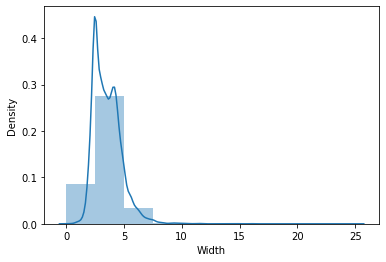

In [14]:
sns.distplot(df['Width'], bins=10) 

/Users/mattwawner/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Views last week', ylabel='Density'>

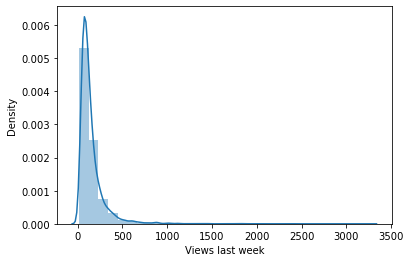

In [15]:
sns.distplot(df['Views last week'], bins=30) 

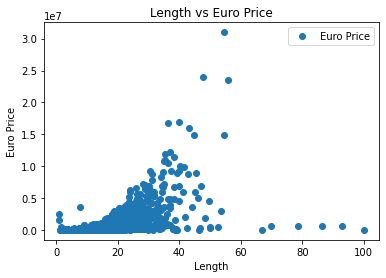

In [16]:
# Creating a scatter plot

df.plot(x = 'Length', y='Euro Price',style='o') 
plt.title('Length vs Euro Price')  
plt.xlabel('Length')  
plt.ylabel('Euro Price')  
plt.show()

# Hypothesis
### As the length of the boat increases, the Euro price will also increase. More specifically, the price will increase at a much faster pace as the length of a boat exceeds 20m.

# 3. Regression Analysis

In [17]:
X = df['Length'].values.reshape(-1,1)
y = df['Euro Price'].values.reshape(-1,1)

In [18]:
X

array([[4.  ],
       [4.  ],
       [3.  ],
       ...,
       [4.4 ],
       [4.37],
       [3.6 ]])

In [19]:
y

array([[3370.37],
       [3490.  ],
       [3367.  ],
       ...,
       [4499.  ],
       [4300.  ],
       [3817.8 ]])

# Split data into a training set and a test set.

In [20]:
# Splitting data into training & test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
# Create a regression object.

regression = LinearRegression()

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

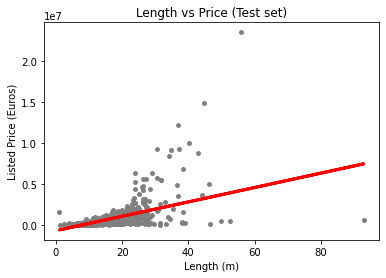

In [24]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Length vs Price (Test set)')
plot_test.xlabel('Length (m)')
plot_test.ylabel('Listed Price (Euros)')
plot_test.show()

In [25]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[87748.56608004]]
Mean squared error:  523338972825.466
R2 score:  0.3257860780956171


In [27]:
y_predicted

array([[-163673.64132778],
       [ 305781.18720044],
       [-156653.75604137],
       ...,
       [ -82944.96053414],
       [ 573414.31374457],
       [  35515.60367392]])

In [28]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,25250.0,-1.636736e+05
1,77000.0,3.057812e+05
2,44000.0,-1.566538e+05
3,37990.0,2.937320e+04
4,70000.0,2.785791e+05
5,19160.0,-2.207102e+05
6,75000.0,1.487113e+05
7,19000.0,1.083469e+05
8,62665.0,-7.153765e+04
9,1699000.0,1.959842e+06


In [29]:
# Predict.

y_predicted_train = regression.predict(X_train) 

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[87748.56608004]]
Mean squared error:  610862703759.8517
R2 score:  0.3152495998729159


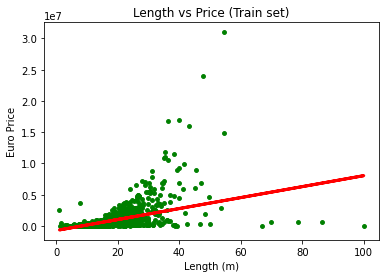

In [32]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Length vs Price (Train set)')
plot_test.xlabel('Length (m)')
plot_test.ylabel('Euro Price')
plot_test.show()

In [33]:
# Excluding listed prices greater than 10 million Euros

df_test = df[df['Euro Price'] <=10000000] 

In [34]:
df_test = df_test[df_test['Length'] <=60] 

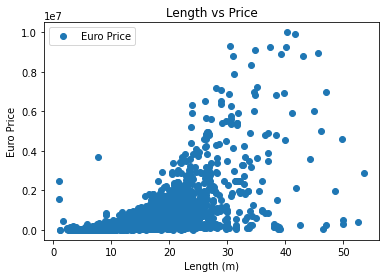

In [35]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Length', y='Euro Price', style='o')  
plt.title('Length vs Price')  
plt.xlabel('Length (m)')  
plt.ylabel('Euro Price')  
plt.show()

In [36]:
# Reshape again.

X_2 = df_test['Length'].values.reshape(-1,1)
y_2 = df_test['Euro Price'].values.reshape(-1,1)

In [37]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [38]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [39]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [40]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [41]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[75383.28843306]]
Mean squared error:  235346571125.99402
R2 score:  0.4176819929228326


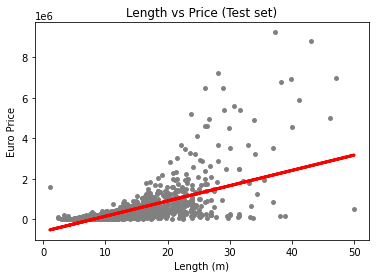

In [42]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Length vs Price (Test set)')
plot_test.xlabel('Length (m)')
plot_test.ylabel('Euro Price')
plot_test.show()

### The slope indicates that for every 1 meter increase in length, the listed price of the boat increases by ~75,000 euros. The MSE is extremely high and indicates the relationship is not very accurate. However, the R squared value indicates that around 41% of the variation in Euro Price can be explained by the length of the boat. Bias could be affecting the results, as the prices are only the listed prices determined by the owner/seller, and not the price actually paid for the boat. In conclusion, the model performed moderately well, but can certainly be improved.

# 4. Exporting Data

In [43]:
# Exporting data
df.to_pickle(os.path.join(path, '3Clean_Boat_Data.pkl'))